# Assignment 2: Mini-project 
## Aakanksha Dongala- a1903581

# Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading datasets

In [2]:
# Load the training and testing dataset
train_data = pd.read_csv("basket_data_by_date_train_big.csv")
test_data = pd.read_csv("basket_data_by_date_test_big.csv")

# Display the first few rows of the training and testing dataset
print("Training dataset:",train_data.head())
print("\nTesting dataset:",test_data.head())

Training dataset:    BillNo                             Itemname  Quantity            Date  \
0  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  1/12/2010 8:26   
1  536365    GLASS STAR FROSTED T-LIGHT HOLDER         6  1/12/2010 8:26   
2  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  1/12/2010 8:26   
3  536365       RED WOOLLY HOTTIE WHITE HEART.         6  1/12/2010 8:26   
4  536365         SET 7 BABUSHKA NESTING BOXES         2  1/12/2010 8:26   

   Price  CustomerID   cost  
0   3.39       17850  20.34  
1   4.25       17850  25.50  
2   2.55       17850  15.30  
3   3.39       17850  20.34  
4   7.65       17850  15.30  

Testing dataset:    BillNo                             Itemname  Quantity              Date  \
0  572741       CHRISTMAS CRAFT LITTLE FRIENDS         6  25/10/2011 15:47   
1  572741           BISCUIT TIN 50'S CHRISTMAS         6  25/10/2011 15:47   
2  572741       CHRISTMAS CRAFT TREE TOP ANGEL         6  25/10/2011 15:47   
3  572741  ROTA

# Data Exploration and Preprocessing

###### Training dataset

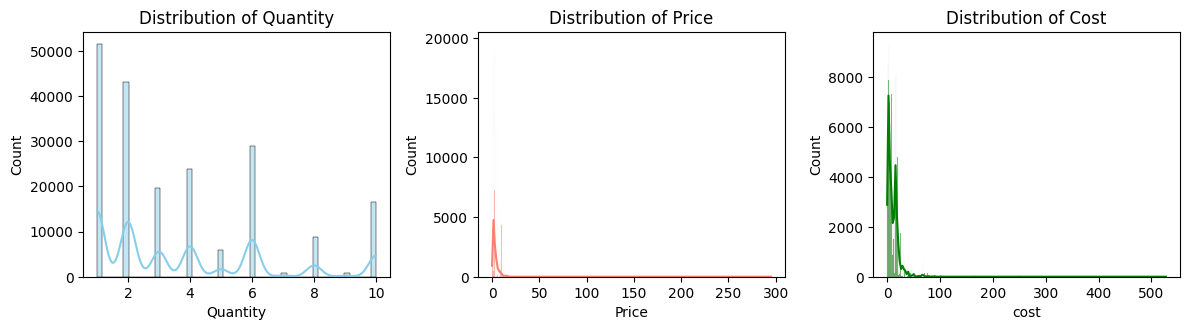

In [3]:
# Plotting histograms for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(train_data['Quantity'], kde=True, color='skyblue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(train_data['Price'], kde=True, color='salmon')
plt.title('Distribution of Price')

plt.subplot(2, 3, 3)
sns.histplot(train_data['cost'], kde=True, color='green')
plt.title('Distribution of Cost')

plt.tight_layout()
plt.show()


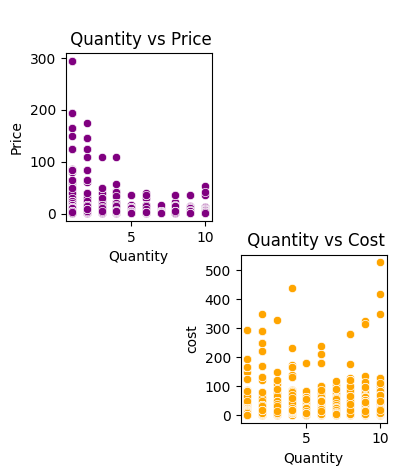

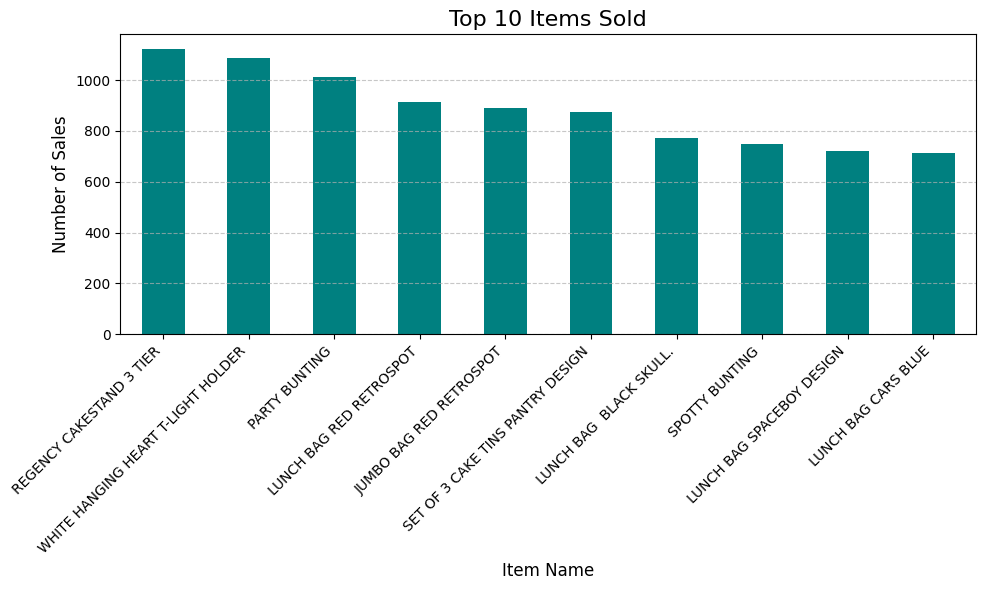

In [4]:
# Plotting scatter plot for Quantity vs Price
plt.subplot(2, 3, 1)
sns.scatterplot(x='Quantity', y='Price', data=train_data, color='purple')
plt.title('\n Quantity vs Price')

# Plotting scatter plot for Quantity vs Cost
plt.subplot(2, 3, 5)
sns.scatterplot(x='Quantity', y='cost', data=train_data, color='orange')
plt.title('\n Quantity vs Cost')

# Plotting bar plot for top 10 items sold
plt.figure(figsize=(10, 6))
top_10_items = train_data['Itemname'].value_counts().head(10)
top_10_items.plot(kind='bar', color='teal')
plt.title('Top 10 Items Sold', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

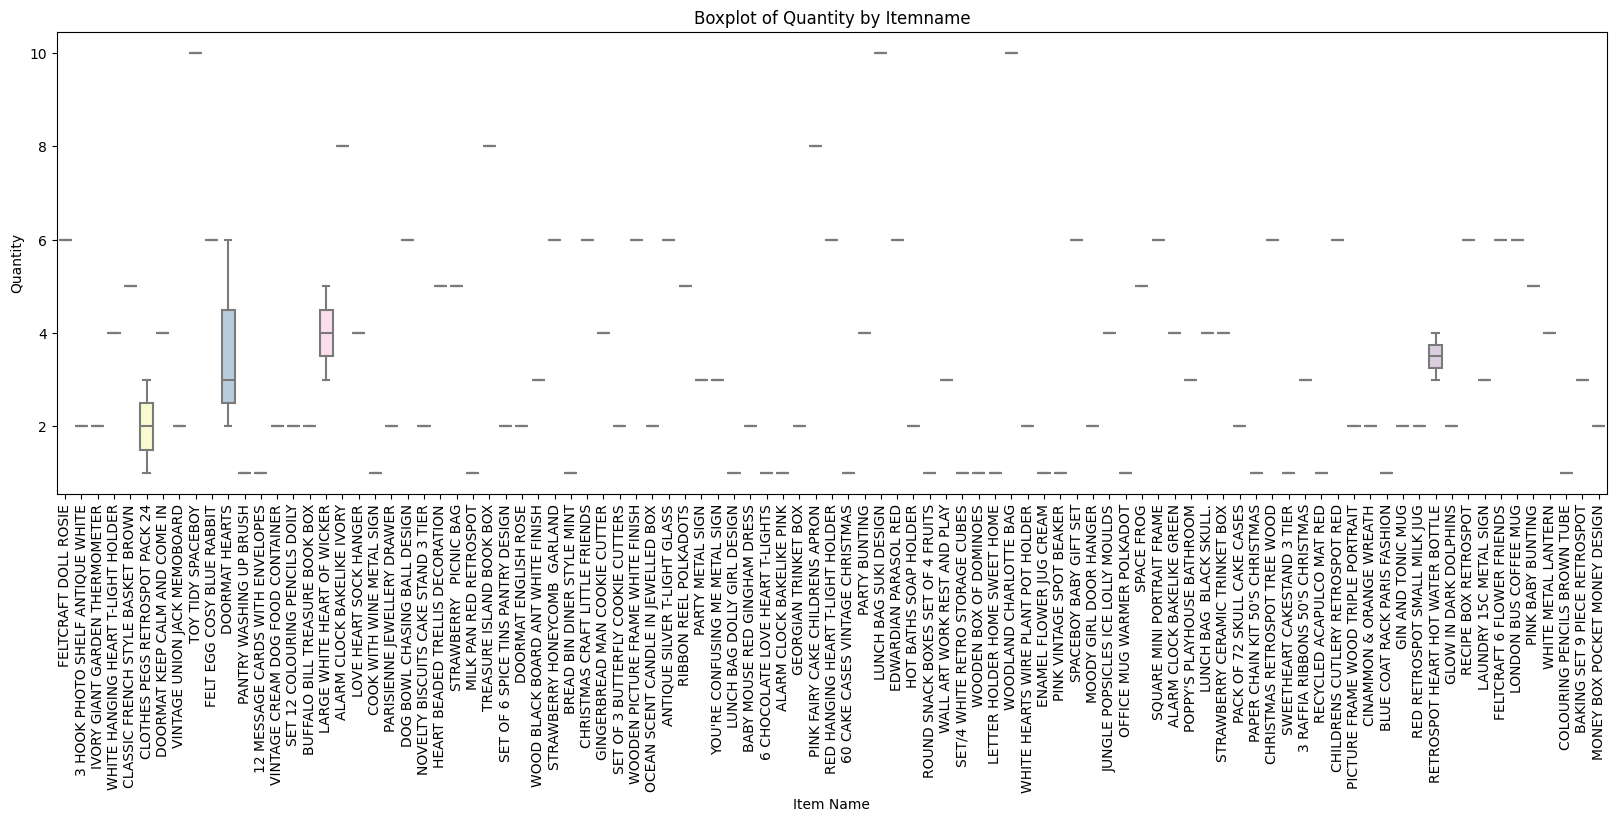

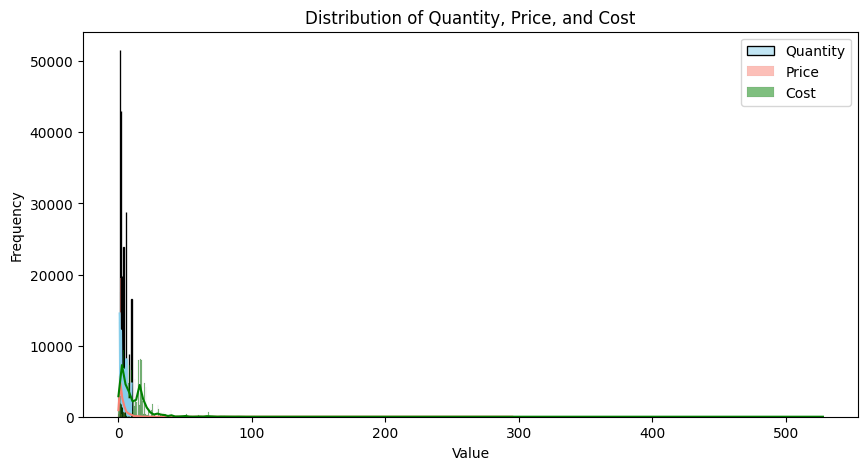

In [5]:
#Box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x='Itemname', y='Quantity', data=train_data.sample(n=100), palette='Pastel1')
plt.title('Boxplot of Quantity by Itemname')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)

# Frequency graph
plt.figure(figsize=(10,5))
sns.histplot(train_data['Quantity'], kde=True, color='skyblue', label='Quantity')
sns.histplot(train_data['Price'], kde=True, color='salmon', label='Price')
sns.histplot(train_data['cost'], kde=True, color='green', label='Cost')
plt.title('Distribution of Quantity, Price, and Cost')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\aakan\AppData\Local\Temp\ipykernel_27668\1652889426.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


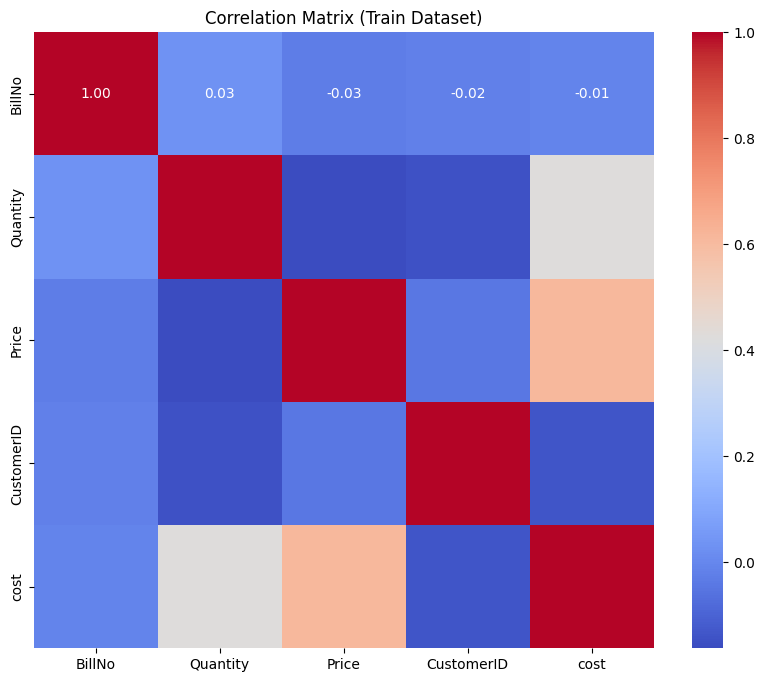

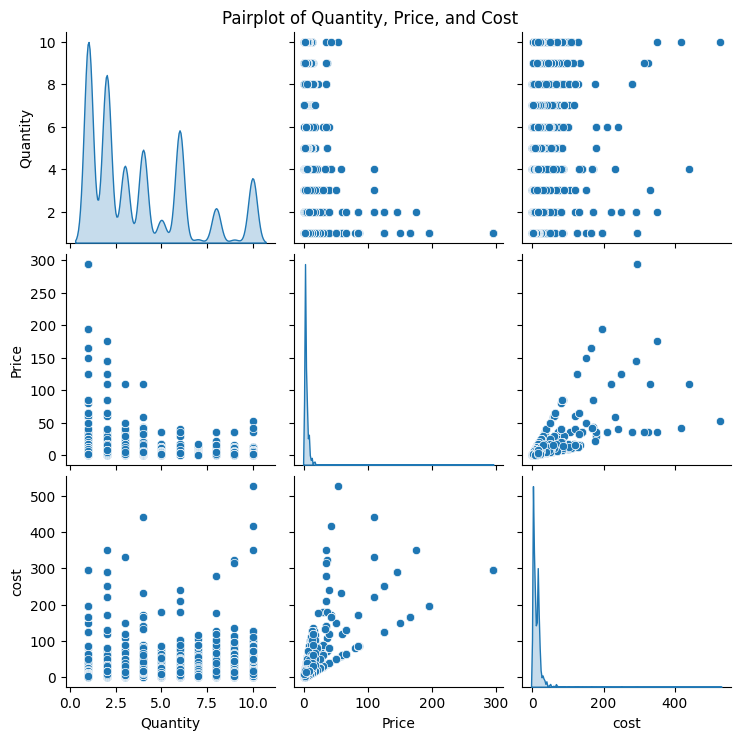

In [6]:
# Heat map and pairplots
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Train Dataset)')

sns.pairplot(train_data[['Quantity', 'Price', 'cost']], diag_kind='kde')
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot of Quantity, Price, and Cost')
plt.show()

###### Testing dataset

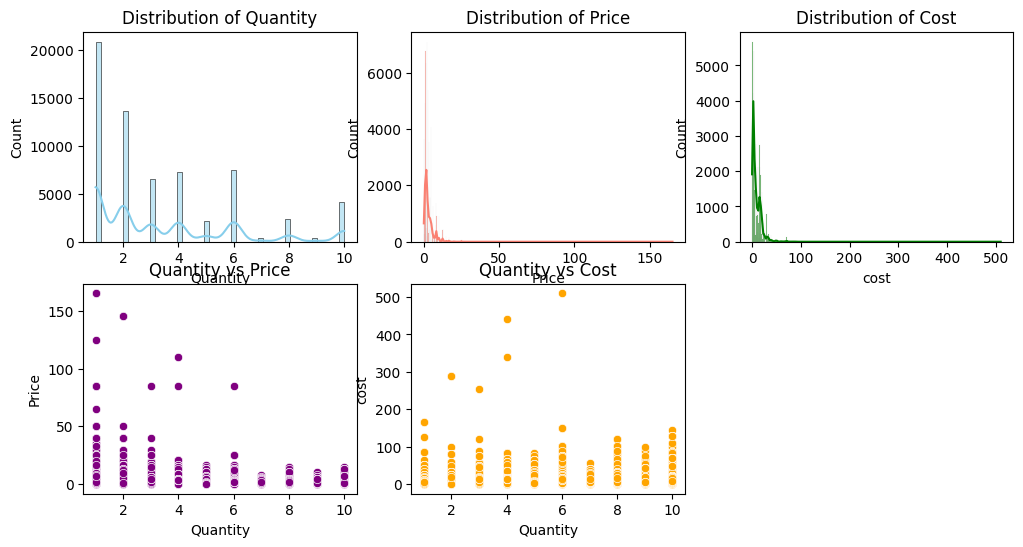

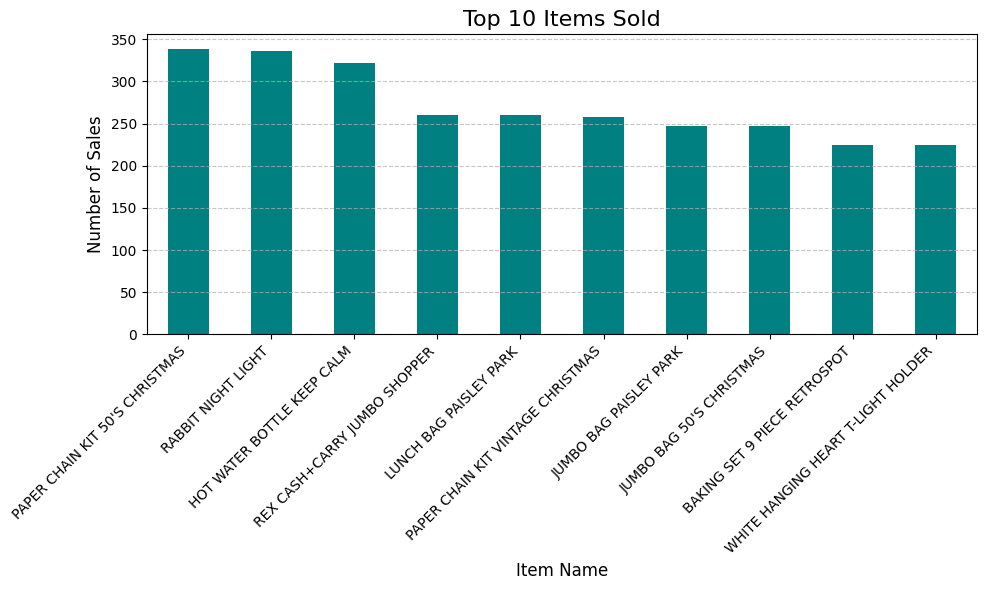

In [7]:

# Plotting histograms for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(test_data['Quantity'], kde=True, color='skyblue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(test_data['Price'], kde=True, color='salmon')
plt.title('Distribution of Price')

plt.subplot(2, 3, 3)
sns.histplot(test_data['cost'], kde=True, color='green')
plt.title('Distribution of Cost')

# Plotting scatter plot for Quantity vs Price
plt.subplot(2, 3, 4)
sns.scatterplot(x='Quantity', y='Price', data=test_data, color='purple')
plt.title('Quantity vs Price')

# Plotting scatter plot for Quantity vs Cost
plt.subplot(2, 3, 5)
sns.scatterplot(x='Quantity', y='cost', data=test_data, color='orange')
plt.title('Quantity vs Cost')

# Plotting bar plot for top 10 items sold
plt.figure(figsize=(10, 6))
top_10_items = test_data['Itemname'].value_counts().head(10)
top_10_items.plot(kind='bar', color='teal')
plt.title('Top 10 Items Sold', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

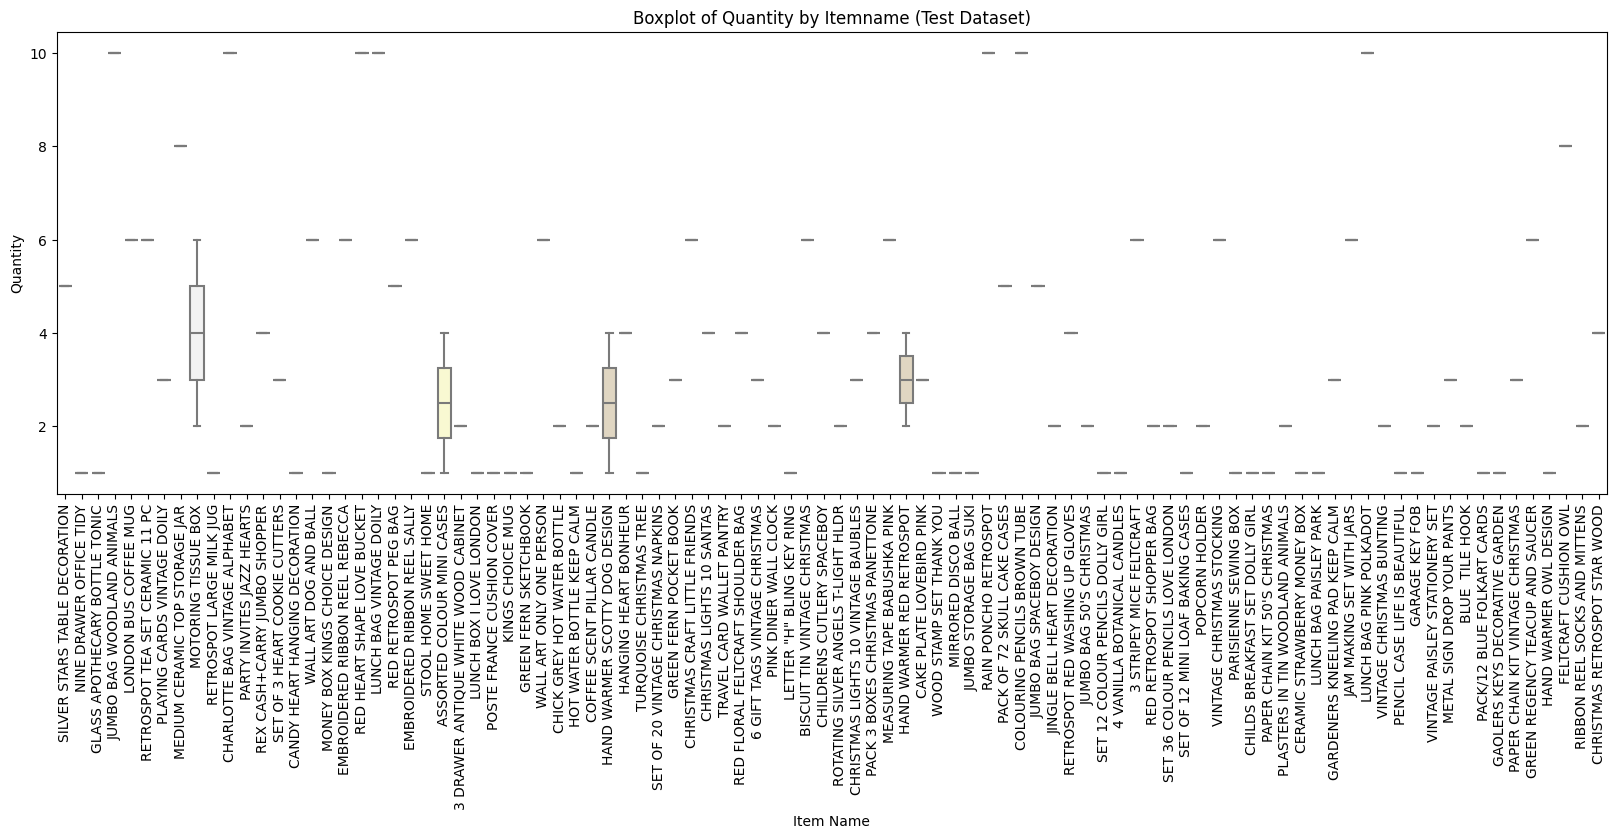

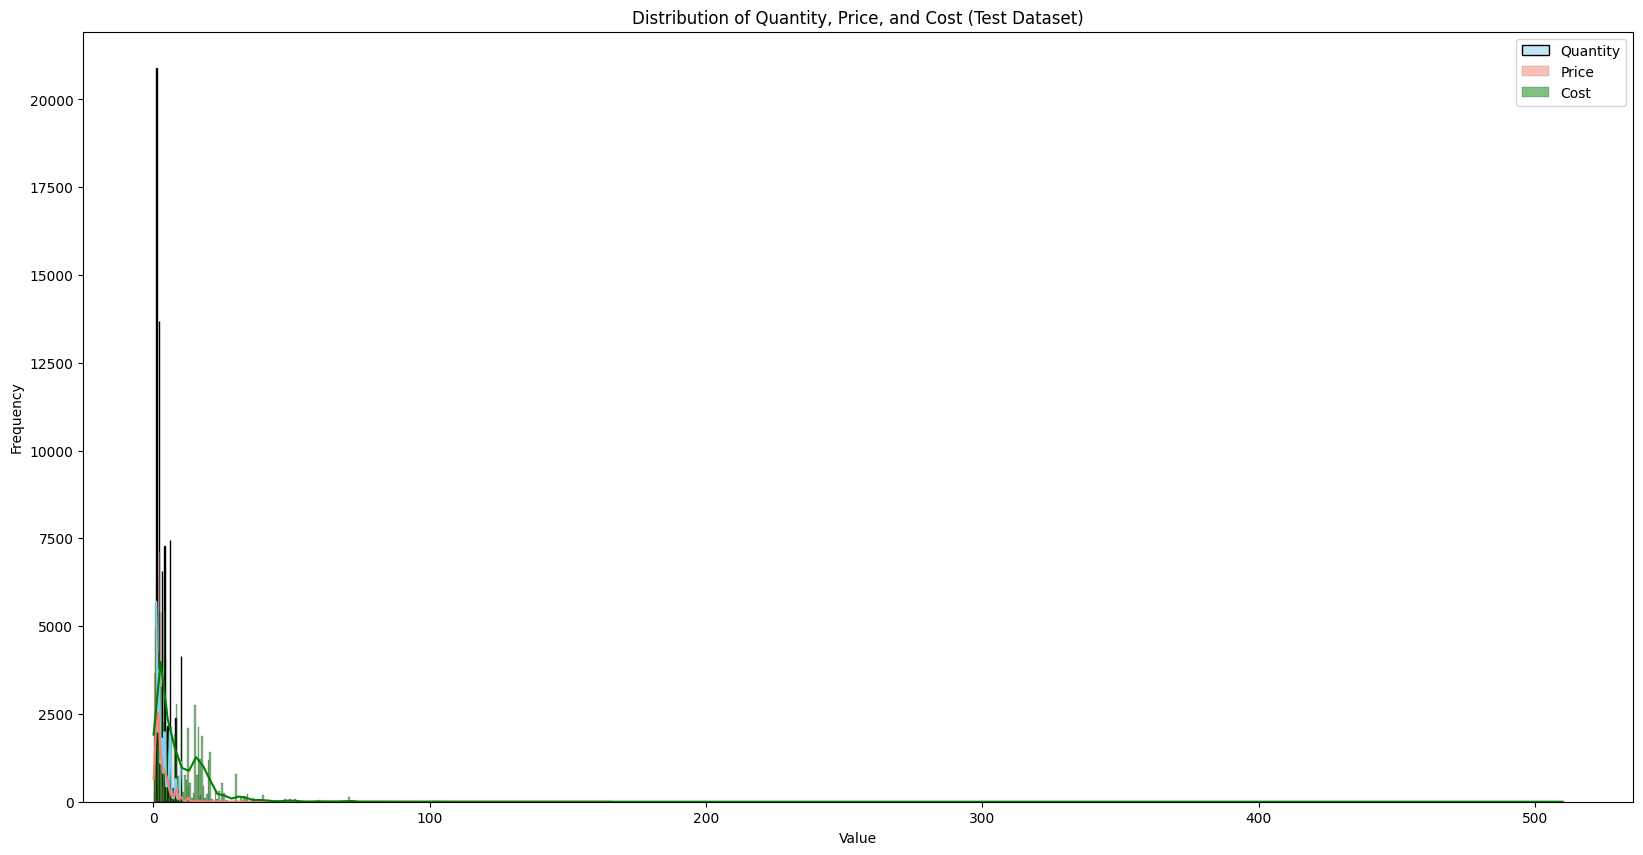

In [8]:
plt.figure(figsize=(20, 6)) 
sns.boxplot(x='Itemname', y='Quantity', data=test_data.sample(n=100), palette='Pastel1')
plt.title('Boxplot of Quantity by Itemname (Test Dataset)')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(test_data['Quantity'], kde=True, color='skyblue', label='Quantity')
sns.histplot(test_data['Price'], kde=True, color='salmon', label='Price')
sns.histplot(test_data['cost'], kde=True, color='green', label='Cost')
plt.title('Distribution of Quantity, Price, and Cost (Test Dataset)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\aakan\AppData\Local\Temp\ipykernel_27668\47220767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


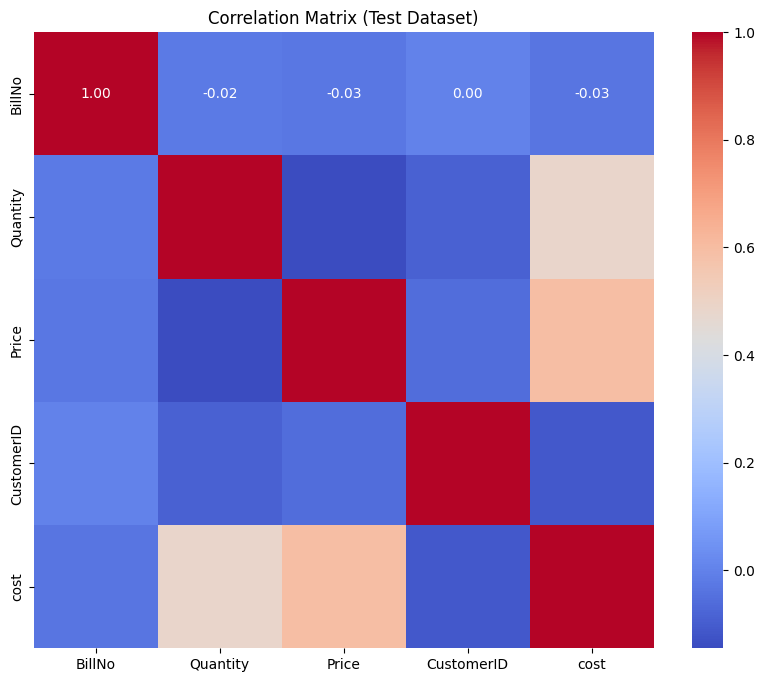

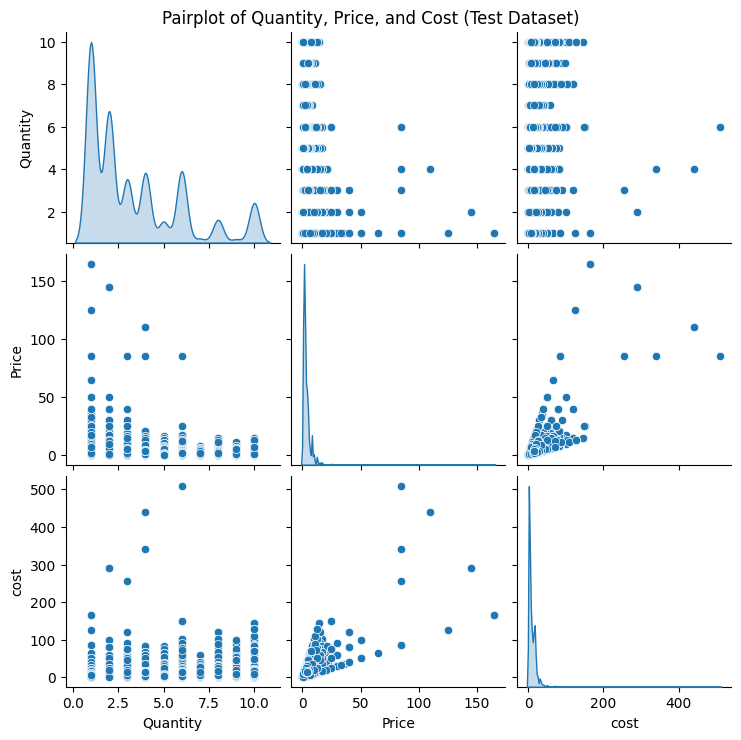

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Test Dataset)')

sns.pairplot(test_data[['Quantity', 'Price', 'cost']], diag_kind='kde')
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot of Quantity, Price, and Cost (Test Dataset)')
plt.show()

In [10]:
# Display descriptive statistics for numerical columns in each dataset
print("Training dataset:\n", train_data.describe())
print("\nTesting dataset:\n", test_data.describe())

Training dataset:
               BillNo       Quantity          Price     CustomerID  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean   555444.533915       3.720960       3.609832   15461.086845   
std     10778.632198       2.763365       4.928895    1687.747367   
min    536365.000000       1.000000       0.060000   12347.000000   
25%    546084.000000       1.000000       1.650000   14096.000000   
50%    555653.000000       3.000000       2.550000   15464.000000   
75%    565324.000000       6.000000       4.250000   16931.000000   
max    572741.000000      10.000000     295.000000   18287.000000   

                cost  
count  200000.000000  
mean       11.227514  
std        11.995236  
min         0.100000  
25%         3.300000  
50%         8.400000  
75%        16.500000  
max       527.700000  

Testing dataset:
               BillNo      Quantity         Price    CustomerID          cost
count   65326.000000  65326.000000  65326.000000  65326.

In [11]:
# Display the number of rows and columns in each dataset
print("Training dataset:", train_data.shape)
print("Testing dataset:", test_data.shape)

Training dataset: (200000, 7)
Testing dataset: (65326, 7)


In [12]:
# Display the structure of the training dataset
print("Training dataset structure:",train_data.info())
# Display the structure of the testing dataset
print("\nTesting dataset structure:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      200000 non-null  int64  
 1   Itemname    200000 non-null  object 
 2   Quantity    200000 non-null  int64  
 3   Date        200000 non-null  object 
 4   Price       200000 non-null  float64
 5   CustomerID  200000 non-null  int64  
 6   cost        200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB
Training dataset structure: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      65326 non-null  int64  
 1   Itemname    65326 non-null  object 
 2   Quantity    65326 non-null  int64  
 3   Date        65326 non-null  object 
 4   Price       65326 non-null  float64
 5   CustomerID  6532

In [13]:
# Check for missing values in each dataset
print("Training dataset:\n", train_data.isnull().sum())
print("\nTesting dataset:\n", test_data.isnull().sum())

Training dataset:
 BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

Testing dataset:
 BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64


In [14]:
# Drop duplicates from the training and testing dataset
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [15]:
# Convert 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [16]:
# Drop rows with missing CustomerID or Itemname
train_data.dropna(subset=['CustomerID', 'Itemname'], inplace=True)
# Handle missing values in the testing dataset
test_data.dropna(subset=['BillNo'], inplace=True)

In [17]:
# Group items by transaction (BillNo, CustomerID, and Itemname) and create a list of items for each transaction
train_transactions = train_data.groupby(['BillNo', 'CustomerID', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
test_transactions = test_data.groupby('BillNo')['Itemname'].apply(list).reset_index(name='Items')

In [18]:
# Display the preprocessed datasets
print("Preprocessed Training Dataset:",train_transactions.head())
print("\nPreprocessed Testing Dataset:",test_transactions.head())

Preprocessed Training Dataset:    BillNo  CustomerID                             Itemname  Quantity
0  536365       17850       CREAM CUPID HEARTS COAT HANGER         8
1  536365       17850    GLASS STAR FROSTED T-LIGHT HOLDER         6
2  536365       17850  KNITTED UNION FLAG HOT WATER BOTTLE         6
3  536365       17850       RED WOOLLY HOTTIE WHITE HEART.         6
4  536365       17850         SET 7 BABUSHKA NESTING BOXES         2

Preprocessed Testing Dataset:    BillNo                                              Items
0  572741  [CHRISTMAS CRAFT LITTLE FRIENDS, BISCUIT TIN 5...
1  572742  [JUMBO BAG VINTAGE CHRISTMAS, RED WOOLLY HOTTI...
2  572743  [WOODEN STAR CHRISTMAS SCANDINAVIAN, RECYCLING...
3  572744  [SET OF 4 JAM JAR MAGNETS, FELTCRAFT PRINCESS ...
4  572745                     [ADVENT CALENDAR GINGHAM SACK]


# Frequent Item Mining

In [19]:

# Convert the transaction data into a one-hot encoded format
train_encoded = train_data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')
train_encoded = train_encoded.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets using the Apriori algorithm
min_support = 0.01  # Adjust the minimum support threshold as needed
frequent_itemsets = apriori(train_encoded, min_support=min_support, use_colnames=True)
print("Frequent Itemsets:",frequent_itemsets)

# Generate association rules
min_threshold = 0.5  # Adjust the minimum confidence threshold as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
print("\nAssociation Rules:",rules)

c:\Users\aakan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:       support                                           itemsets
0    0.017841                 (3 HOOK PHOTO SHELF ANTIQUE WHITE)
1    0.016690               (3 PIECE SPACEBOY COOKIE CUTTER SET)
2    0.018499                         (3 STRIPEY MICE FELTCRAFT)
3    0.011921               (3 TRADITIONAl BISCUIT CUTTERS  SET)
4    0.018910                           (6 RIBBONS RUSTIC CHARM)
..        ...                                                ...
687  0.013895  (LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ...
688  0.011099  (LUNCH BAG SUKI DESIGN, LUNCH BAG WOODLAND, LU...
689  0.011839  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
690  0.011428  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...
691  0.010770  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...

[692 rows x 2 columns]

Association Rules:                                            antecedents  \
0                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
1                     (ALARM CLOCK BAKELI

# Recommendation system on training dataset

In [20]:
# Function to create user-item interaction matrix
def create_user_item_matrix(data):
    user_item_matrix = data.pivot_table(index='CustomerID', columns='Itemname', values='Quantity', fill_value=0)
    return user_item_matrix

# Function to calculate cosine similarity between users
def calculate_similarity(user_item_matrix):
    similarity_matrix = cosine_similarity(user_item_matrix)
    similarity_df = pd.DataFrame(similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)
    return similarity_df

# Function to find top similar users for a given user
def find_similar_users(target_user, similarity_matrix, n_neighbors=5):
    similar_users = similarity_matrix.loc[target_user].sort_values(ascending=False)[1:n_neighbors+1].index.tolist()
    return similar_users

# Function to generate item recommendations for a target user based on similar users' purchases
def generate_item_recommendations(target_user, similar_users, user_item_matrix, n_recommendations=3):
    user_items = user_item_matrix.loc[similar_users].sum()
    user_items = user_items[user_items == 0]  # Exclude items already purchased by the target user
    recommendations = user_items.sort_values(ascending=False).head(n_recommendations).index.tolist()
    return recommendations

# Convert transaction data to user-item interaction matrix
user_item_matrix = create_user_item_matrix(train_data)

# Calculate similarity between users
similarity_matrix = calculate_similarity(user_item_matrix)

# Randomly choose a target user from the user-item interaction matrix
target_user = random.choice(user_item_matrix.index)

# Find top similar users for the randomly chosen target user
similar_users = find_similar_users(target_user, similarity_matrix)

# Generate item recommendations for the target user
recommendations = generate_item_recommendations(target_user, similar_users, user_item_matrix)

# the results
print("Target User:", target_user)
print("Top Similar Users:", similar_users)
print("Item Recommendations:", recommendations)

Target User: 16257
Top Similar Users: [13347, 13352, 13369, 15555, 13338]
Item Recommendations: ['10 COLOUR SPACEBOY PEN', 'POLKADOT PEN', 'PLAYING CARDS VINTAGE DOILEY']


# Evaluation and Testing on the test dataset

In [21]:
# Collaborative Filtering Recommendation System

# Calculate user-item interaction matrix
user_item_matrix = test_data.pivot_table(index='CustomerID', columns='Itemname', values='Quantity', aggfunc='sum', fill_value=0)

# Calculate similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get top similar users for a target user
def get_top_similar_users(target_user, similarity_matrix, top_n=5):
    similar_users = similarity_matrix.loc[target_user].sort_values(ascending=False).drop(target_user).head(top_n).index.tolist()
    return similar_users

# Function to get item recommendations for a target user
def get_item_recommendations(target_user, user_item_matrix, similarity_matrix, top_n=3):
    similar_users = get_top_similar_users(target_user, similarity_matrix)
    recommendations = []
    for user in similar_users:
        user_items = user_item_matrix.loc[user]
        for item in user_items[user_items == 1].index:
            if item not in user_item_matrix.loc[target_user][user_item_matrix.loc[target_user] == 1].index:
                recommendations.append(item)
        if len(recommendations) >= top_n:
            break
    return recommendations[:top_n]

# Print recommendations for a sample target user from the testing dataset
target_user = test_data['CustomerID'].sample().iloc[0]
print("Target User:", target_user)
print("Item Recommendations:", get_item_recommendations(target_user, user_item_matrix, similarity_matrix))

Target User: 17841
Item Recommendations: ['ANTIQUE HEART SHELF UNIT', 'BIRD HOUSE HOT WATER BOTTLE', 'BISCUIT TIN VINTAGE CHRISTMAS']


In [22]:
# Load the dataset
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(test_data[['CustomerID', 'Itemname', 'Quantity']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD algorithm
algo = SVD()
algo.fit(trainset)

# Predict ratings for the test set
predictions = algo.test(testset)

# Compute precision, recall, and F1-score
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    f1_scores = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

        # F1-score@K: Harmonic mean of precision and recall
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) != 0 else 0

    return precisions, recalls, f1_scores

# Compute precision, recall, and F1-score at k=10
k = 10
precisions, recalls, f1_scores = precision_recall_at_k(predictions, k=k, threshold=3.5)

# Average precision, recall, and F1-score over all users
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)
avg_f1_score = sum(f1 for f1 in f1_scores.values()) / len(f1_scores)

# Print evaluation metrics
print("Precision@{}: {:.2f}".format(k, avg_precision))
print("Recall@{}: {:.2f}".format(k, avg_recall))
print("F1-score@{}: {:.2f}".format(k, avg_f1_score))


Precision@10: 1.00
Recall@10: 0.14
F1-score@10: 0.14
